<a href="https://colab.research.google.com/github/JustinPMaio/RoboticSwarmSimulation/blob/main/Justin_Maio_assignment_2_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace
import numpy as np
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torchvision.transforms as transforms
import random
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython import display
plt.rcParams["figure.figsize"] = 16, 12

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-x70h53g5
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-x70h53g5
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=a8c06c24b6ca50b6ba3da651d7c3d71e37bd24202b26067ab663854429965ffa
  Stored in directory: /tmp/pip-ephem-wheel-cache-0h7dyg1z/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [15]:
# warming up
# automatic differentiation
x = torch.ones(1, requires_grad=True)

y = x**2 + 5 

z = 4 * y * y 

print(x, y, z)

# lets calculate dz/dx = dz/dy * dy/dx
# dz / dy = 8 * y
# dy / dx = 2 * x
# dz / dx = 16 * x * y

# using automatic differentiation
# calculates all the required partial derivatives 
z.backward()
print(x.grad)

tensor([1.], requires_grad=True) tensor([6.], grad_fn=<AddBackward0>) tensor([144.], grad_fn=<MulBackward0>)
tensor([96.])


In [16]:
class MLP(torch.nn.Module):

    def __init__(self):
        # must call base constructor
        super(MLP, self).__init__()
        # fully connected layers
        self.fc1 = nn.Linear(64, 25)
        self.fc2 = nn.Linear(25, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 10)

    def forward(self, x):        
        x = func.relu(self.fc1(x))
        x = func.relu(self.fc2(x))
        x = func.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [22]:
class DigitsDataset(Dataset):

    def __init__(self, x, y):
        # you can normalize if you want
        self.x = torch.from_numpy(x).float()
        #self.x = func.normalize(self.x, p=1, dim=0)
        
        # no need for one-hot encoding
        # every y is a scalar in the [0,C-1] interval
        self.y = torch.from_numpy(y)
                
        # save the number of examples
        self.n_samples = len(digits.images)

    def __getitem__(self, idx):
        return [self.x[idx], self.y[idx]]

    def __len__(self):
        return self.n_samples


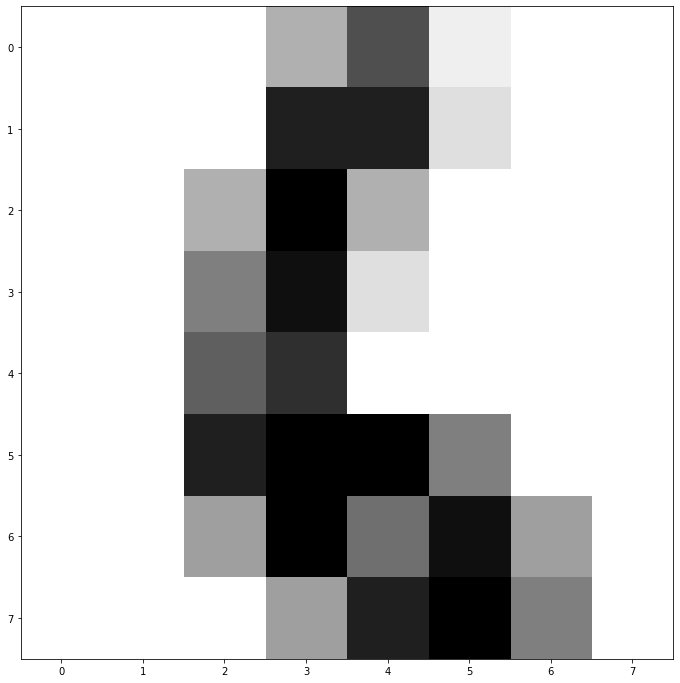

In [23]:
digits = load_digits()
idx = random.randrange(digits.data.shape[0])
plt.imshow(digits.data[idx].reshape(8,8), cmap=plt.cm.gray_r)

In [38]:
train_dataset = DigitsDataset(digits.data, digits.target)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=4)

x_train_tensor = torch.from_numpy(x).float()
y_train_tensor = torch.from_numpy(y)

train_dataset = DigitsDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])
train_dataset, val_dataset = random_split(train_dataset, [80, 20])

train_dataloader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=4)
val_dataloader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, num_workers=4)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


TypeError: ignored

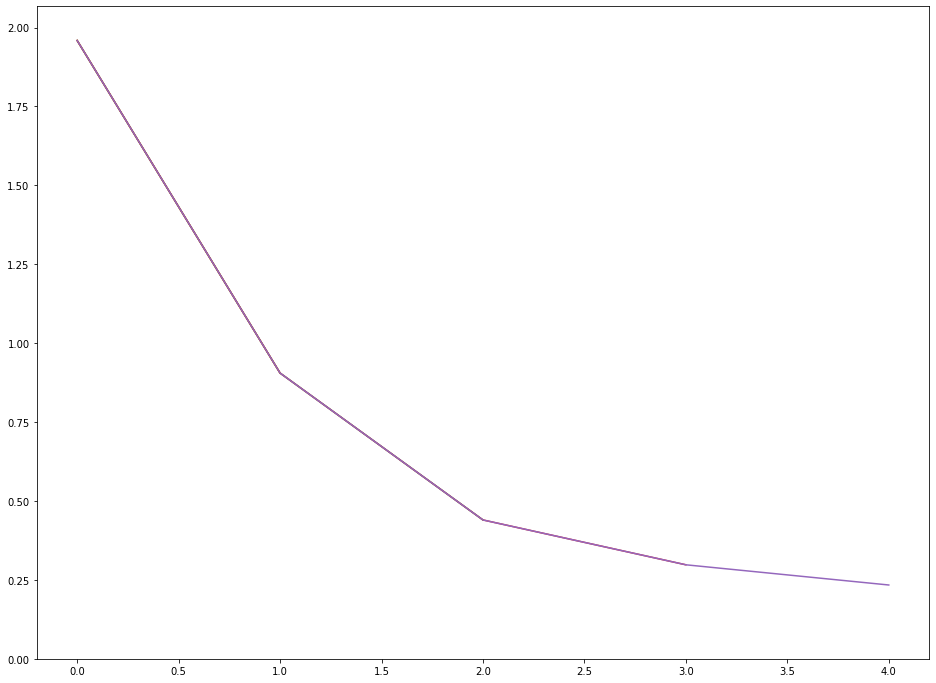

In [31]:
print(len(train_dataset))
n_epochs = 5
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
all_loses = []
for epoch in range(n_epochs):
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    for nn_x, nn_y in train_dataloader:
        optimizer.zero_grad()
        pred = model(nn_x) # forward pass of an entire batch
        loss = criterion(pred, nn_y)
        loss.backward() # gradient calculation
        tr_epoch_loss += loss.item()
        optimizer.step() # gradient step -- update weights
    all_loses.append(tr_epoch_loss / len(train_dataset))
    plt.plot(all_loses)
    plt.ylim(bottom=0)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))

Epoch: 499   Loss: 7.030198077132089e-05
Epoch: 500   Loss: 7.003022959710899e-05


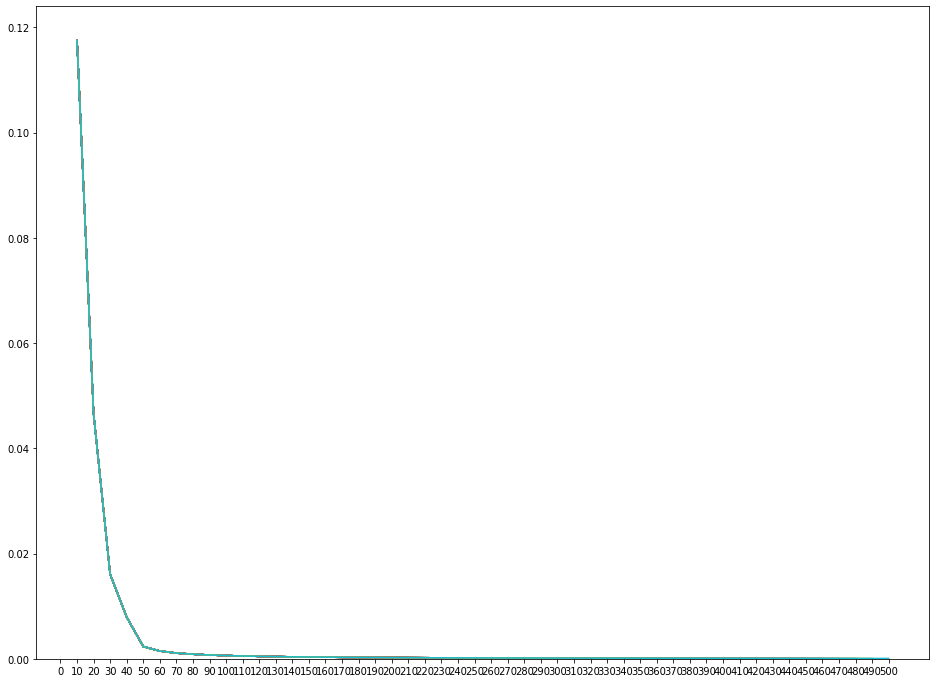

In [32]:
# Train model with SGD
print(len(train_dataset))
n_epochs = 500
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
every_tenth_epoch_loss = []
every_tenth_x = []
i = 1
for epoch in range(n_epochs):
    i += 1
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    for nn_x, nn_y in train_dataloader:
        optimizer.zero_grad()
        pred = model(nn_x) # forward pass of an entire batch
        loss = criterion(pred, nn_y)
        loss.backward() # gradient calculation
        tr_epoch_loss += loss.item()
        optimizer.step() # gradient step -- update weights
    if i%10 == 0:
      every_tenth_epoch_loss.append(tr_epoch_loss / len(train_dataset))
      every_tenth_x.append(i)
      plt.xticks(np.arange(0, 501, 10))
      plt.rcParams["figure.figsize"] = (20,8)
      plt.plot(every_tenth_x, every_tenth_epoch_loss)
      plt.ylim(bottom=0)
      display.display(plt.gcf())
      display.clear_output(wait=True)
    print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))

Epoch: 499   Loss: 2.3911147376830273e-06
Epoch: 500   Loss: 2.3835185245633057e-06


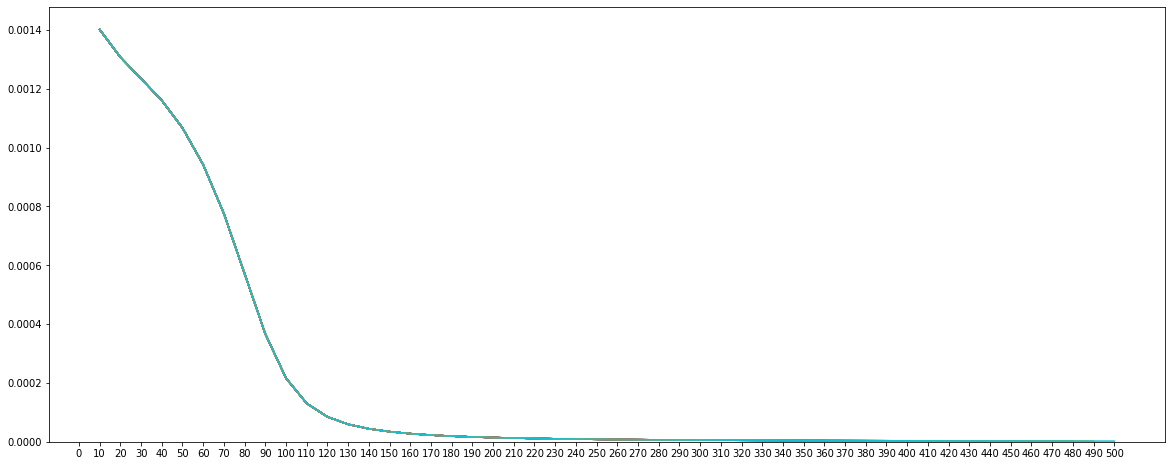

In [33]:
# Train model with batch
print(len(train_dataset))
n_epochs = 500
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
every_tenth_epoch_loss = []
every_tenth_x = []
i = 1
for epoch in range(n_epochs):
    i += 1
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    optimizer.zero_grad()
    pred = model(nn_x) # forward pass of an entire batch
    loss = criterion(pred, nn_y)
    loss.backward() # gradient calculation
    tr_epoch_loss += loss.item()
    optimizer.step() # gradient step -- update weights
    if i%10 == 0:
      every_tenth_epoch_loss.append(tr_epoch_loss / len(train_dataset))
      every_tenth_x.append(i)
      plt.xticks(np.arange(0, 501, 10))
      plt.rcParams["figure.figsize"] = (20,8)
      plt.plot(every_tenth_x, every_tenth_epoch_loss)
      plt.ylim(bottom=0)
      display.display(plt.gcf())
      display.clear_output(wait=True)
    print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))

Epoch: 499   Loss: 6.979867156434362e-05
Epoch: 500   Loss: 6.967271939646888e-05


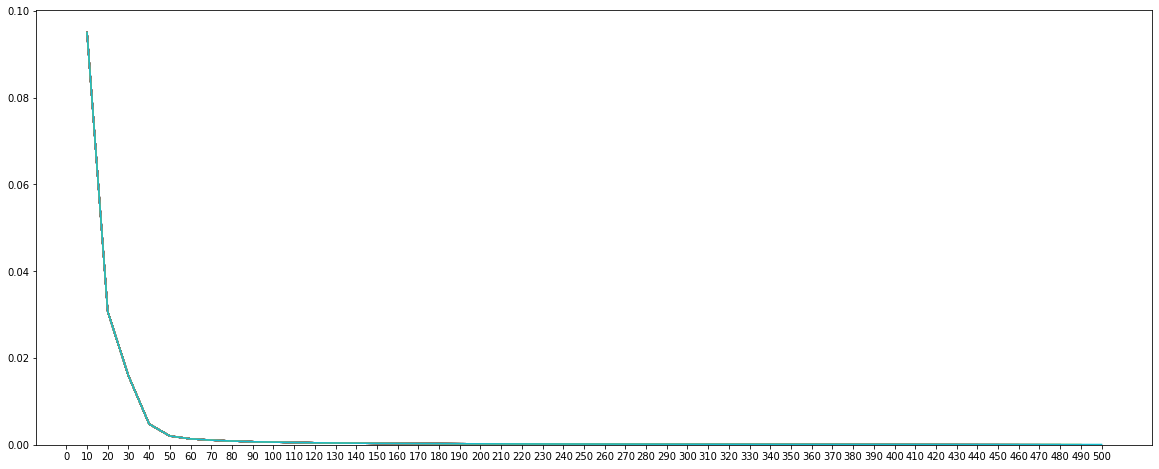

In [34]:
# Train model with mini-batch size 32
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
print(len(train_loader))
n_epochs = 500
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
every_tenth_epoch_loss = []
every_tenth_x = []
i = 1
for epoch in range(n_epochs):
    i += 1
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    for nn_x, nn_y in train_loader:
        optimizer.zero_grad()
        pred = model(nn_x) # forward pass of an entire batch
        loss = criterion(pred, nn_y)
        loss.backward() # gradient calculation
        tr_epoch_loss += loss.item()
        optimizer.step() # gradient step -- update weights
    if i%10 == 0:
      every_tenth_epoch_loss.append(tr_epoch_loss / len(train_dataset))
      every_tenth_x.append(i)
      plt.xticks(np.arange(0, 501, 10))
      plt.rcParams["figure.figsize"] = (20,8)
      plt.plot(every_tenth_x, every_tenth_epoch_loss)
      plt.ylim(bottom=0)
      display.display(plt.gcf())
      display.clear_output(wait=True)
    print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))


Epoch: 499   Loss: 7.325145102354355e-05
Epoch: 500   Loss: 7.31986129146461e-05


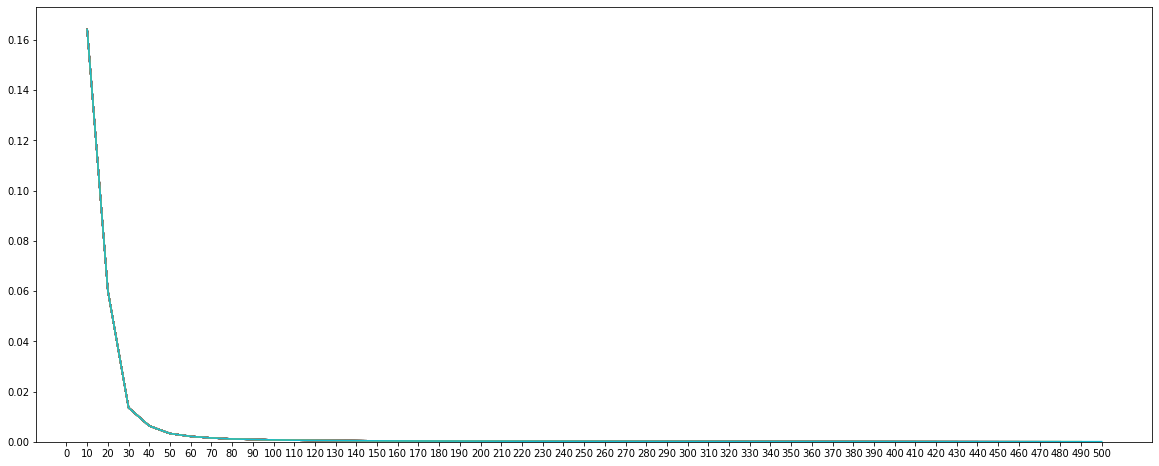

In [35]:
# Train model with mini-batch size 64
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
print(len(train_loader))
n_epochs = 500
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
every_tenth_epoch_loss = []
every_tenth_x = []
i = 1
for epoch in range(n_epochs):
    i += 1
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    for nn_x, nn_y in train_loader:
        optimizer.zero_grad()
        pred = model(nn_x) # forward pass of an entire batch
        loss = criterion(pred, nn_y)
        loss.backward() # gradient calculation
        tr_epoch_loss += loss.item()
        optimizer.step() # gradient step -- update weights
    if i%10 == 0:
      every_tenth_epoch_loss.append(tr_epoch_loss / len(train_dataset))
      every_tenth_x.append(i)
      plt.xticks(np.arange(0, 501, 10))
      plt.rcParams["figure.figsize"] = (20,8)
      plt.plot(every_tenth_x, every_tenth_epoch_loss)
      plt.ylim(bottom=0)
      display.display(plt.gcf())
      display.clear_output(wait=True)
    print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))

Epoch: 499   Loss: 0.002866808055959249
Epoch: 500   Loss: 0.002907594609086344


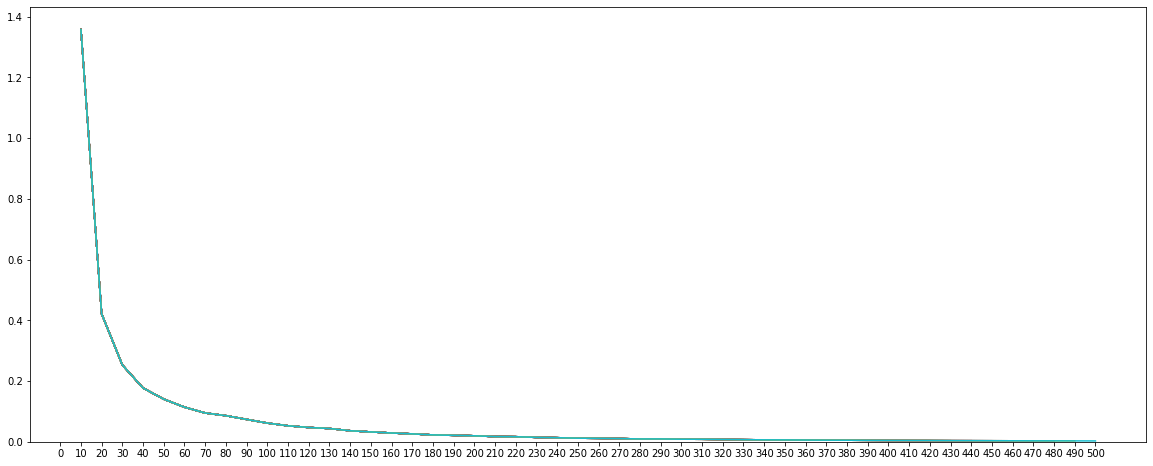

In [39]:
# Train model with mini-batch size 128
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
print(len(train_loader))
n_epochs = 500
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss(reduction='sum')

# an epoch is one pass over the entire training set
every_tenth_epoch_loss = []
every_tenth_x = []
i = 1
for epoch in range(n_epochs):
    i += 1
    tr_epoch_loss = 0
    model.train() # can also use model.eval() for inference
    for nn_x, nn_y in train_loader:
        optimizer.zero_grad()
        pred = model(nn_x) # forward pass of an entire batch
        loss = criterion(pred, nn_y)
        loss.backward() # gradient calculation
        tr_epoch_loss += loss.item()
        optimizer.step() # gradient step -- update weights
    if i%10 == 0:
      every_tenth_epoch_loss.append(tr_epoch_loss / len(train_dataset))
      every_tenth_x.append(i)
      plt.xticks(np.arange(0, 501, 10))
      plt.rcParams["figure.figsize"] = (20,8)
      plt.plot(every_tenth_x, every_tenth_epoch_loss)
      plt.ylim(bottom=0)
      display.display(plt.gcf())
      display.clear_output(wait=True)
    print('Epoch: {}   Loss: {}'.format(epoch+1, tr_epoch_loss/len(train_dataset)))